<div style="border:solid green 3px; padding: 20px">

<b>Привет!</b>

Меня зовут Сороколетов Илья и я буду проверять твой проект. 

Предлагаю общаться на «**ты**», но если тебе будет комфортнее общаться на «**вы**», то сообщи об этом в комментариях)


Для твоего удобства, я буду выделять свои комментарии следующим образом:

<div class="alert alert-danger">
<b>❌ Комментарий ревьюера v1:</b> Самые важные замечания. Они указывают на ключевые моменты, которые влияют на конечный результат проекта. </div>

<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера v1:</b> Советы или замечания, которые помогут сделать твою работу лучше, но необязательны к выполнению.

</div>

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> Так я выделяю все остальные комментарии.</div>


Пометками <b>v1-v2-v3-...</b> я буду отмечать версию проверки. Так ты сможешь быстро найти мои новые комментарии.

Давай работать над проектом в диалоге: если ты что-то меняешь в проекте по моим рекомендациям — пиши об этом. Выбери для своих комментариев какой-то заметный цвет, так мне будет легче отследить изменения, например вот так:
    
<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>
</div>

<b>Пожалуйста, не перемещай, не изменяй и не удаляй мои комментарии.</b> Если ты оставляешь свои комментарии, то делай это под моими, чтобы сообщения были расположены в хронологическом порядке. Всё это поможет выполнить повторную проверку твоего проекта быстрее. 


Перед отправкой работы я рекомендую нажимать Kernel -> Restart & Run All. Это перезапустит ядро и по очереди выполнит все ячейки. Так ты сможешь проверить, что всё работает корректно. Кнопка Kernel находится в панели сверху

Обязательно задавай вопросы если они возникнут, а я перехожу к проверке)

P.S. На всякий случай, я оставлю пустой шаблон для твоих комментариев ниже. Кликни два раза на мой комментарий, скопируй последние четыре строчки кода и вставляй их в пустую ячейку там, где ты хочешь оставить комментарий. Не забудь только перед этим сменить тип ячейки на Markdown. Быстро это можно сделать так: кликнуть на ячейку - нажать ESC - нажать M. 
    
    
<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>Место для твоего комментария
</div>

# Исследование надежности заемщиков.

# Описание проекта

 Заказчик — кредитный отдел банка. Нужно разобраться, влияет ли семейное положение и количество детей клиента на факт погашения кредита в срок. Входные данные от банка — статистика о платёжеспособности клиентов. Результаты исследования будут учтены при построении модели кредитного скоринга — специальной системы, которая оценивает способность потенциального заёмщика вернуть кредит банку.

 
 **Цель исследования** — проверьте две гипотезы:
1. Семейное положение влияет на погашение кредита в срок
2. Наличие детей так же влияет.

3. (Дополнительно хочу проверить как влияют остальные факторы, ведь любой показатель может иметь значение, хоть это и не являеться основной задачей, я думаю это будет интересно ;)

**Ход исследования**

О данных ничего не известно. Поэтому перед проверкой гипотез понадобится обзор данных. После оценки данных на ошибки, я оценю влияют-ли они на исследование или нет, если да, то выполню предобработку. Так же может потребоваться провести категоризацию.

 Таким образом, исследование пройдёт в три этапа:
 1. Обзор данных.
 2. Предобработка данных, которая включает: 
 * проверка на пропуски
 * дубликаты
 * ошибки и аномалии
 * а так же категаризация данных.
 3. Проверка гипотез путём сравнения с средним показанием столбца 'debt'.
 4. Так же я хочу проскорить таблицу и проверить насколько сильно влияют эти факторы.

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Молодец, что добавляешь описание проекта. Это поможет тебе быстро вспомнить о чем проект, если спустя время ты решишь к нему вернуться)
</div>

### Шаг 1. Обзор данных

In [1]:
import pandas as pd
from pymystem3 import Mystem
m = Mystem()
from collections import Counter

from sklearn.model_selection import train_test_split as tts
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_transformer, ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import roc_curve, auc, roc_auc_score, accuracy_score, precision_recall_curve, f1_score

from sklearn.linear_model import LogisticRegression as LR, RidgeClassifier as RC, Ridge
from sklearn.tree import DecisionTreeClassifier as DTC
from catboost import Pool, CatBoostClassifier as CBC, cv

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
#plt.style.use('default')
plt.style.use('dark_background') # я работаю в темной теме, поэтому использую эту настройку.
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

s = 121222

In [2]:
df = pd.read_csv('data.csv')
display(df.head(10))
display(df.tail(10))

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
21515,1,-467.685130,28,среднее,1,женат / замужем,0,F,сотрудник,1,109486.327999,заняться образованием
21516,0,-914.391429,42,высшее,0,женат / замужем,0,F,компаньон,0,322807.776603,покупка своего жилья
21517,0,-404.679034,42,высшее,0,гражданский брак,1,F,компаньон,0,178059.553491,на покупку своего автомобиля
21518,0,373995.710838,59,СРЕДНЕЕ,1,женат / замужем,0,F,пенсионер,0,153864.650328,сделка с автомобилем
21519,1,-2351.431934,37,ученая степень,4,в разводе,3,M,сотрудник,0,115949.039788,покупка коммерческой недвижимости
21520,1,-4529.316663,43,среднее,1,гражданский брак,1,F,компаньон,0,224791.862382,операции с жильем
21521,0,343937.404131,67,среднее,1,женат / замужем,0,F,пенсионер,0,155999.806512,сделка с автомобилем
21522,1,-2113.346888,38,среднее,1,гражданский брак,1,M,сотрудник,1,89672.561153,недвижимость
21523,3,-3112.481705,38,среднее,1,женат / замужем,0,M,сотрудник,1,244093.050500,на покупку своего автомобиля
21524,2,-1984.507589,40,среднее,1,женат / замужем,0,F,сотрудник,0,82047.418899,на покупку автомобиля


<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера v1:</b> 
<br>Все библиотеки лучше импортировать отдельно в первой ячейке. Это позволит тебе в любой момент добавить ещё одну библиотеку без перезаписи переменных.
</div>

In [3]:
df.describe()

,children,days_employed,dob_years,education_id,family_status_id,debt,total_income
count,21525.000000,19351.000000,21525.000000,21525.000000,21525.000000,21525.000000,1.935100e+04
mean,0.538908,63046.497661,43.293380,0.817236,0.972544,0.080883,1.674223e+05
std,1.381587,140827.311974,12.574584,0.548138,1.420324,0.272661,1.029716e+05
min,-1.000000,-18388.949901,0.000000,0.000000,0.000000,0.000000,2.066726e+04
25%,0.000000,-2747.423625,33.000000,1.000000,0.000000,0.000000,1.030532e+05
50%,0.000000,-1203.369529,42.000000,1.000000,0.000000,0.000000,1.450179e+05
75%,1.000000,-291.095954,53.000000,1.000000,1.000000,0.000000,2.034351e+05
max,20.000000,401755.400475,75.000000,4.000000,4.000000,1.000000,2.265604e+06


В столбце days_emploeyd максимальный стаж больше 100 лет (возможно там имеються ввиду часы?), при том что максимальный возраст в таблице 75 лет, да и ещё и куча отрицательных значений, по нему одназначно стоит падать запрос заказчику. Я изучу его подробнее ниже, и возможно удалю, потому что эта характеристика не являеться ключевой для решения кейса + явно забагована.

Следующие аномалия - количество детей от минус 1 до 20. Первое не может быть, второе посмотрим подробнее.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


В days_employed и total_income одинаковое количество пропусков, вероятно в одних и тех же строках. Нужно будет привести их в порядок, особенно total_income.

In [5]:
df['debt'].mean() #доля должников до обработки - ключевое значение для нашего исследования.

0.08088269454123112

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Хороший анализ! Круто, что ты уже знаешь и используешь метод describe()
</div>

### Шаг 2.1 Заполнение пропусков

In [6]:
df.isna().mean() #проверка пропущенных значений

children            0.000000
days_employed       0.100999
dob_years           0.000000
education           0.000000
education_id        0.000000
family_status       0.000000
family_status_id    0.000000
gender              0.000000
income_type         0.000000
debt                0.000000
total_income        0.100999
purpose             0.000000
dtype: float64

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>👍 отличный способ посмотреть долю пропусков
</div>

Разбремся с days_employed и total_income, посмотрим в каких значениях пропуски. Возможно так забаговал  какой-нибудь тип клиента к примеру "пенсионер" или любой другой параметр.

In [7]:
df.loc[(df['days_employed'].isna()) & (df['total_income'].isna()),'dob_years'].count()
#подсчет пропущенных значений в обох столбцах вместе

2174

In [8]:
df.loc[(df['days_employed'].isna()) & (df['total_income'].isna())].head(10)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
12,0,NaN,65,среднее,1,гражданский брак,1,M,пенсионер,0,NaN,сыграть свадьбу
26,0,NaN,41,среднее,1,женат / замужем,0,M,госслужащий,0,NaN,образование
29,0,NaN,63,среднее,1,Не женат / не замужем,4,F,пенсионер,0,NaN,строительство жилой недвижимости
41,0,NaN,50,среднее,1,женат / замужем,0,F,госслужащий,0,NaN,сделка с подержанным автомобилем
55,0,NaN,54,среднее,1,гражданский брак,1,F,пенсионер,1,NaN,сыграть свадьбу
65,0,NaN,21,среднее,1,Не женат / не замужем,4,M,компаньон,0,NaN,операции с коммерческой недвижимостью
67,0,NaN,52,высшее,0,женат / замужем,0,F,пенсионер,0,NaN,покупка жилья для семьи
72,1,NaN,32,высшее,0,женат / замужем,0,M,госслужащий,0,NaN,операции с коммерческой недвижимостью
82,2,NaN,50,высшее,0,женат / замужем,0,F,сотрудник,0,NaN,жилье
83,0,NaN,52,среднее,1,женат / замужем,0,M,сотрудник,0,NaN,жилье


Никакой закономерности нет, поэтому я удалю days_employed, а пропуски total_income заменю медийным значением по каждому виду дохода.

In [9]:
income_category = df.groupby('income_type')['total_income'].median()

In [10]:
income_category

income_type
безработный        131339.751676
в декрете           53829.130729
госслужащий        150447.935283
компаньон          172357.950966
пенсионер          118514.486412
предприниматель    499163.144947
сотрудник          142594.396847
студент             98201.625314
Name: total_income, dtype: float64

In [11]:
for c in income_category.index:
    m = income_category[c]
    df.loc[df.loc[:, 'income_type']==c, 'total_income'] = df.loc[df.loc[:, 'income_type']==c, 'total_income'].fillna(m)

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>То что нужно! Это отличный способ для замены пропусков в данном случае. Также можно всё сделать в одну строчку через transform:
    
    df['total_income'] = df['total_income'].fillna(df.groupby('income_type')['total_income'].transform("median"))

<br>Она создаёт новый столбец, который содержит столько же строк, сколько и изначальный, но только вместо оригинальных значений в каждой строке содержится медиана посчитанная по заданной группе. После этого вместо пропусков в оригинальном столбце мы подставляем значения из созданного столбца, то есть медианы в зависимости от группы.
</div>

In [12]:
df['total_income'].isna().sum() #проверяю

0

In [13]:
#df.drop('days_employed', axis='columns', inplace=True) #удаляю столбец

<div class="alert alert-danger">
<b>❌ Комментарий ревьюера v1:</b> 
<br>По заданию необходимо заменить пропуски в столбце days_employed медианой, а также поработать с аномальными значениями в нём
</div>

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br> Хорошо сейчас так и исправлю!
    
   Старые варианты удалять не буду - оставлю за #
<br>
</div>

In [14]:
df['days_employed'] = df['days_employed'].fillna(df.groupby('income_type')['days_employed'].transform("median"))

In [15]:
df['days_employed'].isna().sum()

0

<div class="alert alert-danger">
<b>❌ Комментарий ревьюера v2:</b> 
<br>Пропуски заменили, но вот аномалии в столбце со стажем остались)
</div>

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br> Сделал ниже ;)
<br>
</div>

### Шаг 2.2 Проверка данных на аномалии и исправления.

Здесь я проверю каждый столбец и посмотрю есть-ли там какие-нибудь аномалии и странности.

In [16]:
df['days_employed'].describe()

count     21525.000000
mean      63550.497071
std      141150.420058
min      -18388.949901
25%       -2570.047544
50%       -1355.683356
75%        -316.240646
max      401755.400475
Name: days_employed, dtype: float64

<AxesSubplot:>

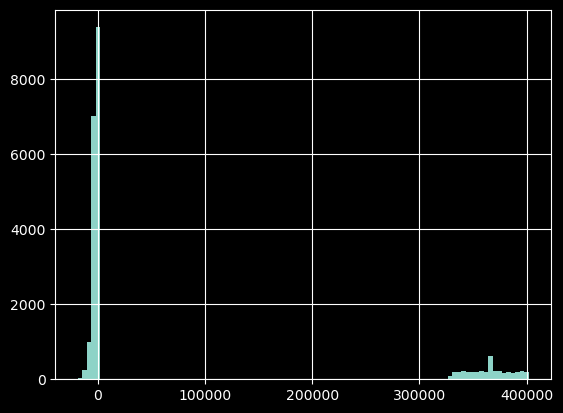

In [17]:
df['days_employed'].hist(bins=100)

In [18]:
print(300000/365)
print(400000/365)
print(300000/24/365)
print(400000/24/365)

821.917808219178
1095.890410958904
34.24657534246575
45.662100456621005


Огромное количество значений меньше или равно нулю, так же есть большая часть в диопазоне от 300000 до 400000 рабочих дней стажа, а это целых как минимум 800 лет, а то и все 1100. Вероятно сюда по ошибке занесли рабочие часы, вместо дней, если разделить на 24, то стаж уже будет более реальный 35-45 лет. А отрицательные числа переведу по модулю в положительные.

In [19]:
def to_pozitive(value):
    if value < 0:
        value *= -1
        return value
    else:
        return value
    
df['days_employed'] = df['days_employed'].apply(to_pozitive)

In [20]:
df['days_employed'].describe()

count     21525.000000
mean      67299.486032
std      139401.804684
min          24.141633
25%        1025.549623
50%        1993.522017
75%        5347.024506
max      401755.400475
Name: days_employed, dtype: float64

<AxesSubplot:>

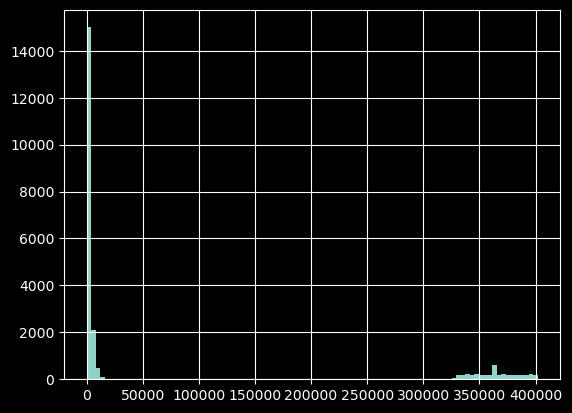

In [21]:
df['days_employed'].hist(bins=100)

In [22]:
75*365

27375

теперь поделим на 24 значения, которые больше 27375 (это 75 лет стажа - макисмальный возраст в таблице, больше уже никак не может быть.)

In [23]:
df['days_employed']= df['days_employed'].mask( df['days_employed'] > 27375, df['days_employed']/ 24)

<AxesSubplot:>

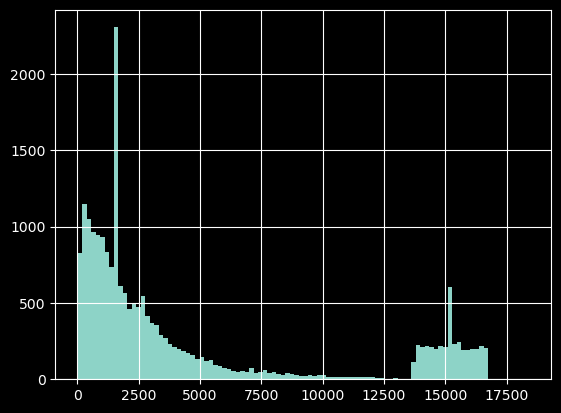

In [24]:
df['days_employed'].hist(bins=100)

In [25]:
df['days_employed'].describe()

count    21525.000000
mean      4600.535795
std       5354.354167
min         24.141633
25%       1025.549623
50%       1993.522017
75%       5347.024506
max      18388.949901
Name: days_employed, dtype: float64

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v3:</b> 
<br>👏🏻👏🏻👏🏻 Отличная работа с аномальными значениями. Молодец!
</div>

Всё равно есть подозрительные всплески, но в целом стало больше похоже на правду;) Я бы в любом случаее подал бы запрос заказчику по поводу этого столбца, в нём больше всего багов.

In [26]:
df['children'].value_counts()

 0     14149
 1      4818
 2      2055
 3       330
 20       76
-1        47
 4        41
 5         9
Name: children, dtype: int64

Проверим, что происходить в строках с аномальными значениями и есть-ли закономрности.

In [27]:
df[df['children']==-1].head(10)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
291,-1,4417.703588,46,среднее,1,гражданский брак,1,F,сотрудник,0,102816.346412,профильное образование
705,-1,902.084528,50,среднее,1,женат / замужем,0,F,госслужащий,0,137882.899271,приобретение автомобиля
742,-1,3174.456205,57,среднее,1,женат / замужем,0,F,сотрудник,0,64268.044444,дополнительное образование
800,-1,14582.827176,54,среднее,1,Не женат / не замужем,4,F,пенсионер,0,86293.724153,дополнительное образование
941,-1,15217.221094,57,Среднее,1,женат / замужем,0,F,пенсионер,0,118514.486412,на покупку своего автомобиля
1363,-1,1195.264956,55,СРЕДНЕЕ,1,женат / замужем,0,F,компаньон,0,69550.699692,профильное образование
1929,-1,1461.303336,38,среднее,1,Не женат / не замужем,4,M,сотрудник,0,109121.569013,покупка жилья
2073,-1,2539.761232,42,среднее,1,в разводе,3,F,компаньон,0,162638.609373,покупка жилья
3814,-1,3045.290443,26,Среднее,1,гражданский брак,1,F,госслужащий,0,131892.785435,на проведение свадьбы
4201,-1,901.101738,41,среднее,1,женат / замужем,0,F,госслужащий,0,226375.766751,операции со своей недвижимостью


In [28]:
df[df['children']==20].head(10)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
606,20,880.221113,21,среднее,1,женат / замужем,0,M,компаньон,0,145334.865002,покупка жилья
720,20,855.595512,44,среднее,1,женат / замужем,0,F,компаньон,0,112998.738649,покупка недвижимости
1074,20,3310.411598,56,среднее,1,женат / замужем,0,F,сотрудник,1,229518.537004,получение образования
2510,20,2714.161249,59,высшее,0,вдовец / вдова,2,F,сотрудник,0,264474.835577,операции с коммерческой недвижимостью
2941,20,2161.591519,0,среднее,1,женат / замужем,0,F,сотрудник,0,199739.941398,на покупку автомобиля
3302,20,2689.368353,35,среднее,1,Не женат / не замужем,4,F,госслужащий,0,150447.935283,профильное образование
3396,20,1547.382223,56,высшее,0,женат / замужем,0,F,компаньон,0,172357.950966,высшее образование
3671,20,913.161503,23,среднее,1,Не женат / не замужем,4,F,сотрудник,0,101255.492076,на покупку подержанного автомобиля
3697,20,2907.910616,40,среднее,1,гражданский брак,1,M,сотрудник,0,115380.694664,на покупку подержанного автомобиля
3735,20,805.044438,26,высшее,0,Не женат / не замужем,4,M,сотрудник,0,137200.646181,ремонт жилью


Закономерностей не вижу, поэтому строки с количеством детей -1 я удалю, потому что неизвестно как они возникли. А 20 поменяю на медийное значение, потому что вероятно это 0 или 2 - на кавиатуре они рядом. Так как количество анамалий меньше процента, то такие изменения на анализ сильно не повлияют.

In [29]:
for str in df[df['children']==-1].index:
        df = df.drop(str)

In [30]:
df['children'] = df['children'].replace(20, df.loc[df.loc[:, 'children'] != 20]['children'].median())

In [31]:
df['children'].value_counts() # проверяем.

0    14225
1     4818
2     2055
3      330
4       41
5        9
Name: children, dtype: int64

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b>
<br>Отличное решение!
</div>

Здесь разобрались! Теперь проверим другие столбцы, начнем с гендера.

In [32]:
df['gender'].value_counts()

F      14201
M       7276
XNA        1
Name: gender, dtype: int64

В принципе один человек особо роли не играет, но чтобы упростить таблицу я поменяю это зачение на то, которое соответствует большинству.

In [33]:
#df['gender'] = df['gender'].replace('XNA','F') 
#изменяю на женский пол, потому что девушек здесь намного больше половины

<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера v1:</b> 
<br>Мы не можем достоверно сказать, к какому полу ближе это значение. Поэтому его стоит или удалить или не трогать)
</div>

<div class="alert alert-info">
<b>Комментарий студента:</b>
    Тогда не буду трогать, всё равно погоды не делает. )
<br>
</div>

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v2:</b>
<br>👍
</div>

In [34]:
#df['gender'].value_counts() #проверяю

In [35]:
df.columns # вывожу список столбцов для удобства

Index(['children', 'days_employed', 'dob_years', 'education', 'education_id',
       'family_status', 'family_status_id', 'gender', 'income_type', 'debt',
       'total_income', 'purpose'],
      dtype='object')

In [36]:
df['education'].value_counts()

среднее                13719
высшее                  4710
СРЕДНЕЕ                  768
Среднее                  709
неоконченное высшее      667
ВЫСШЕЕ                   273
Высшее                   268
начальное                250
Неоконченное высшее       47
НЕОКОНЧЕННОЕ ВЫСШЕЕ       29
НАЧАЛЬНОЕ                 17
Начальное                 15
ученая степень             4
Ученая степень             1
УЧЕНАЯ СТЕПЕНЬ             1
Name: education, dtype: int64

In [37]:
df['education'] = df['education'].str.lower()

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Избавились от большей части дубликатов в данных)
</div>

In [38]:
df['education'].value_counts() #проверяю

среднее                15196
высшее                  5251
неоконченное высшее      743
начальное                282
ученая степень             6
Name: education, dtype: int64

Порядок!

In [39]:
df['family_status'].value_counts()

женат / замужем          12351
гражданский брак          4172
Не женат / не замужем     2808
в разводе                 1191
вдовец / вдова             956
Name: family_status, dtype: int64

Здесь всё в порядке

<AxesSubplot:>

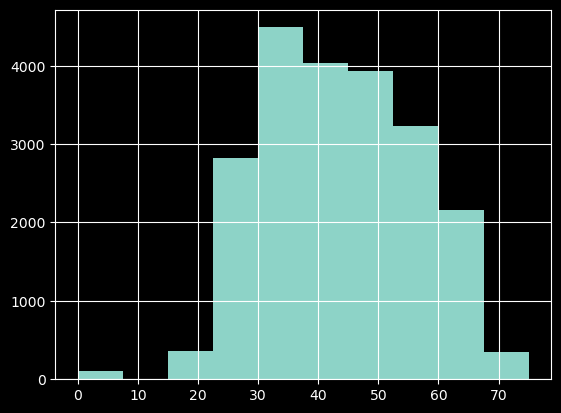

In [40]:
df['dob_years'].hist()

In [41]:
df['dob_years']<18

0        False
1        False
2        False
3        False
4        False
         ...  
21520    False
21521    False
21522    False
21523    False
21524    False
Name: dob_years, Length: 21478, dtype: bool

Сразу видно - аномальное значение 0. Закономерностей нет, поэтому удалю эти значения.

In [42]:
for d in df[df['dob_years']==0].index:
    df = df.drop(d)
    
df = df.reset_index(drop=True)

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>👍
</div>

<AxesSubplot:>

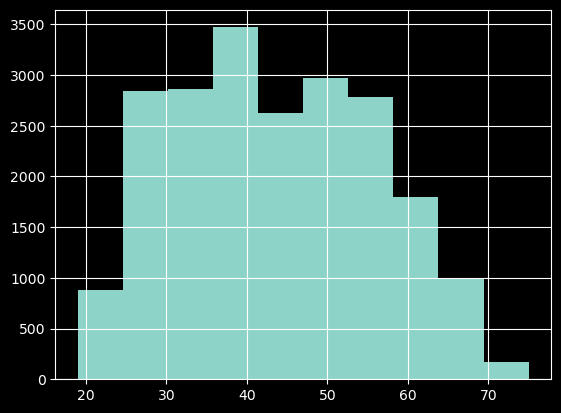

In [43]:
df['dob_years'].hist() #проверяю

Всё нормально.

In [44]:
df['debt'].value_counts()

0    19645
1     1732
Name: debt, dtype: int64

Всё в порядке.

In [45]:
df['purpose'].value_counts()

свадьба                                   792
на проведение свадьбы                     772
сыграть свадьбу                           768
операции с недвижимостью                  671
покупка коммерческой недвижимости         661
покупка жилья для сдачи                   650
операции с коммерческой недвижимостью     648
операции с жильем                         646
покупка жилья для семьи                   640
жилье                                     640
покупка жилья                             638
строительство собственной недвижимости    632
недвижимость                              629
операции со своей недвижимостью           627
строительство недвижимости                620
строительство жилой недвижимости          620
покупка своего жилья                      618
покупка недвижимости                      618
ремонт жилью                              609
покупка жилой недвижимости                602
на покупку своего автомобиля              501
заняться высшим образованием      

Явно требуется леммитизация (привидение к одному названию).

### Шаг 2.3. Изменение типов данных.

In [46]:
df['days_employed'] = df['days_employed'].astype('int')
df['total_income'] = df['total_income'].astype('int')

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Тут всё верно!
</div>

### Шаг 2.4. Удаление дубликатов.

In [47]:
df.duplicated().sum()

71

In [48]:
df[df.duplicated(keep=False)].sort_values(by=['total_income'])

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
21267,0,15217,54,среднее,1,женат / замужем,0,F,пенсионер,0,118514,операции с жильем
6495,0,15217,71,среднее,1,гражданский брак,1,F,пенсионер,0,118514,на проведение свадьбы
6631,0,15217,64,среднее,1,гражданский брак,1,F,пенсионер,0,118514,сыграть свадьбу
6830,0,15217,62,среднее,1,женат / замужем,0,F,пенсионер,0,118514,получение дополнительного образования
7260,0,15217,64,высшее,0,гражданский брак,1,F,пенсионер,0,118514,на проведение свадьбы
...,...,...,...,...,...,...,...,...,...,...,...,...
15873,0,1547,51,среднее,1,гражданский брак,1,F,компаньон,0,172357,на проведение свадьбы
10619,0,1547,40,среднее,1,гражданский брак,1,F,компаньон,0,172357,сыграть свадьбу
5088,0,1547,40,среднее,1,гражданский брак,1,F,компаньон,0,172357,сыграть свадьбу
13774,1,1547,31,среднее,1,женат / замужем,0,F,компаньон,0,172357,покупка жилья


 Дубликаты тоже требуют запроса, возможно один и тот же человек брал кредит несколько раз или же закрался какой-то баг, а может кто-то из работников несколько раз перезаносил данные.

 Так как дубликатов мало я их удалю.

In [49]:
df = df.drop_duplicates()

In [50]:
df.duplicated().sum()

0

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Шикарно! Убрали оставшиеся дубликаты
</div>

### Шаг 2.5. Формирование дополнительных датафреймов словарей, декомпозиция исходного датафрейма.

Здесь я начну рассматривать каждый столбец в сравнении с 'debt' и делать скоринг для наглядности исследвания. Попутно сделаю леммитизацию столбца 'purpuse' и категоризацию 'total_income' 

In [51]:
df['debt'].mean() #средний процент должников после обработки

0.08129165493288276

Примерно 8,1% на него и будем ориентироваться.

In [52]:
df.groupby('children')['debt'].agg(['count','mean']) 
#создаем pivot_table, чтобы посмотреть есть-ли зависимость между debt и количеством детей.

,count,mean
children,,
0,14097,0.075619
1,4792,0.092028
2,2039,0.095145
3,328,0.082317
4,41,0.097561
5,9,0.000000


In [53]:
(0.092028 - 0.075619)/0.092028
#сравниваю две самые весомые категории - нет детей и 1 ребёнок.

0.1783044290867996

Разница почти 18%! А это очень значимое различие, по статистике - отклонениее более 1% уже показатель.
В целом здесь можно выделить две основные категории и обобщить выборку - "есть дети" и "нет детей", так как основное различие именно видно именно здесь.

In [54]:
#df['children'] = df['children'].replace(-1, 1)
#children_median = df.loc[df.loc[:, 'children'] != 20]['children'].median()
#df['children'] = df['children'].replace(20, children_median)
#df.groupby('children')['debt'].agg(['count','mean']) 

In [55]:
df['has_children'] = (df['children'] > 0) *1
df['has_children'] #проверяем 

0        1
1        1
2        0
3        1
4        0
        ..
21372    1
21373    0
21374    1
21375    1
21376    1
Name: has_children, Length: 21306, dtype: int32

In [56]:
df.groupby('has_children')['debt'].agg(['count','mean'])

,count,mean
has_children,,
0,14097,0.075619
1,7209,0.092385


Красота! Никакого шума, а сам показатель очень чёткий и понятный. В скор-поинты у меня пойдут более негативные варианты, у которых 'debt' выше. В скоренге чем болше score, тем больше долже быть средний 'debt'

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Верно! 
</div>

In [57]:
df.groupby('education')['debt'].agg(['count','mean']) #рассмотрим тоже самое для графы "Образование"

,count,mean
education,,
высшее,5206,0.053208
начальное,282,0.109929
неоконченное высшее,741,0.091768
среднее,15071,0.089974
ученая степень,6,0.000000


Здесь так же можно выделить и обобщить две большие категории - есть высшее образование или нет.

In [58]:
df['no_higher_education'] = ~df['education'].isin(['высшее','ученая степень']) *1
df.groupby('no_higher_education')['debt'].agg(['count','mean'])
# 0 - есть высшее, 1 - нет высшего.

,count,mean
no_higher_education,,
0,5212,0.053147
1,16094,0.090406


Здесь специально я вывожу категории с более высокой задолжностью (плохой) под значение 1, а более низкой под значение(хорошей) 0. Это позволит нам заскорить каждого клиента. Гипотиза - чем выше показетель score, тем более высокий шанс задолжности.

In [59]:
df['score'] = df['has_children'] + df['no_higher_education'] # создаем столбец 'score'
df.groupby('score')['debt'].agg(['count','mean']) #проверяем

,count,mean
score,,
0,3254,0.052858
1,12801,0.078041
2,5251,0.106837


Так оно и есть!
Теперь рассмотрим зависимость от возроста, так как категорий много нагляднее будет зделать график.

<AxesSubplot:xlabel='dob_years'>

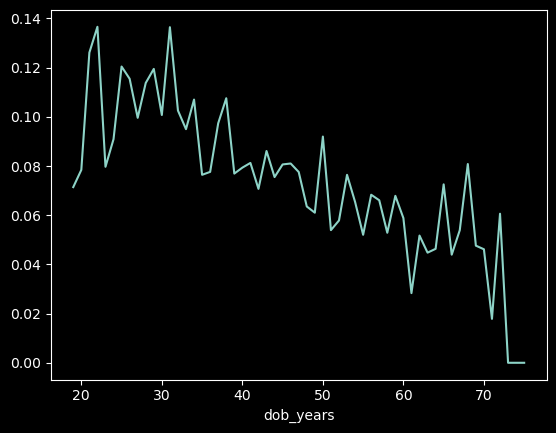

In [60]:
df.groupby('dob_years')['debt'].mean().plot()

Вывод - Чем старше человек, тем меньше шас задолжности, поэтому можно сделать ранжирование, где максимальный возраст будет ближе к 0, а минимальный к 1.

In [61]:
df.columns

Index(['children', 'days_employed', 'dob_years', 'education', 'education_id',
       'family_status', 'family_status_id', 'gender', 'income_type', 'debt',
       'total_income', 'purpose', 'has_children', 'no_higher_education',
       'score'],
      dtype='object')

<AxesSubplot:>

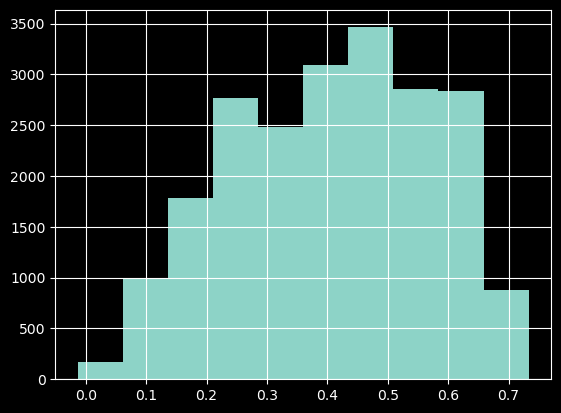

In [62]:
df['dob_years_score'] = ~df['dob_years'] / df['dob_years'].max()+1 # переведём в системе от 0 до 1
df['dob_years_score'].hist()

In [63]:
df.groupby('gender')['debt'].agg(['count','mean'])

,count,mean
gender,,
F,14067,0.070235
M,7238,0.102791
XNA,1,0.000000


Девушки выплачивают в срок чаще мужчин, тоже добавим в скоринг.

In [64]:
df['gender_score'] = df['gender'].isin(['M']) *1
df.groupby('gender_score')['debt'].agg(['count','mean'])

,count,mean
gender_score,,
0,14068,0.070230
1,7238,0.102791


In [65]:
df.groupby('family_status')['debt'].agg(['count','mean'])

,count,mean
family_status,,
Не женат / не замужем,2789,0.097885
в разводе,1181,0.071973
вдовец / вдова,950,0.065263
гражданский брак,4125,0.093576
женат / замужем,12261,0.075524


Видно, что те кто находиться в гражданском браке или никогда не вступал в брак хуже выплачивают долги.

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Тут всё правильно
</div>

In [66]:
df['family_score'] = df['family_status'].isin(['Не женат / не замужем','гражданский брак']) *1
df.groupby('family_score')['debt'].agg(['count','mean'])

,count,mean
family_score,,
0,14392,0.074555
1,6914,0.095314


In [67]:
df['score'] = df[['has_children','no_higher_education','dob_years_score','gender_score','family_score']].sum(axis=1)
df['score_round'] = df['score'].round()
df['score_q'] = pd.qcut(df['score'], 20)
'gender_score' 'family_score'

'gender_scorefamily_score'

<AxesSubplot:xlabel='score_round'>

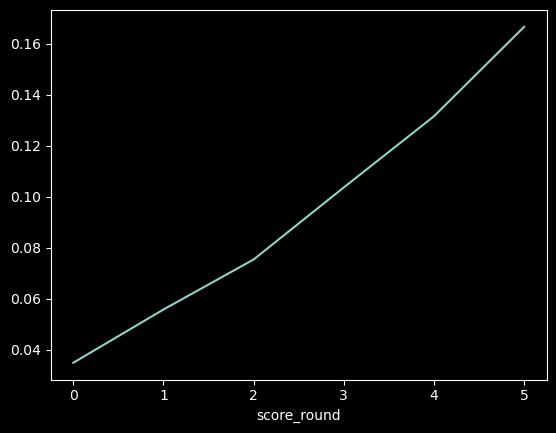

In [68]:
df.groupby('score_round')['debt'].mean().plot() # пердварительный просмотр


In [69]:
df.groupby('score_q')['debt'].agg(['count','mean'])

,count,mean
score_q,,
"(-0.001, 0.533]",1088,0.036765
"(0.533, 1.16]",1210,0.057851
"(1.16, 1.227]",1067,0.048735
"(1.227, 1.28]",909,0.048405
"(1.28, 1.36]",1228,0.054560
"(1.36, 1.44]",1006,0.066600
"(1.44, 1.533]",983,0.066124
"(1.533, 1.653]",1097,0.079307
"(1.653, 2.2]",1135,0.055507


Пока закономерность прослеживается, посмотрим что будет с последими двумя категориями - доходом и целью кредита.

### Шаг 2.6. Категоризация дохода.

In [70]:
df['total_income'].median()

142594.0

In [71]:
df['total_income'].max()

2265604

In [72]:
df['total_income'].min()

20667

In [73]:
df['total_income']

0        253875
1        112080
2        145885
3        267628
4        158616
          ...  
21372    224791
21373    155999
21374     89672
21375    244093
21376     82047
Name: total_income, Length: 21306, dtype: int32

In [74]:
total_income_q = df['total_income']/10000 # округрение дохода

In [75]:
df.groupby([pd.cut(total_income_q,20)])['debt'].agg(['count','mean'])

,count,mean
total_income,,
"(1.842, 13.291]",8606,0.081687
"(13.291, 24.516]",9764,0.084801
"(24.516, 35.741]",2133,0.070323
"(35.741, 46.965]",516,0.067829
"(46.965, 58.19]",164,0.048780
"(58.19, 69.415]",60,0.050000
"(69.415, 80.639]",20,0.050000
"(80.639, 91.864]",14,0.142857
"(91.864, 103.089]",7,0.000000


Большинство находиться до миллиона, поэтому рассмотрю эту часть в гистограмме.

<AxesSubplot:>

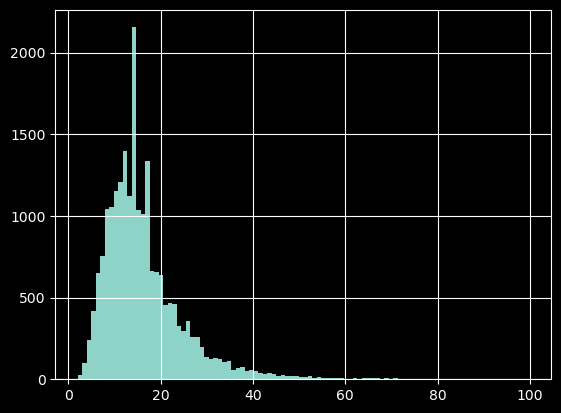

In [76]:
total_income_q.loc[total_income_q<100].hist(bins=100)

<AxesSubplot:>

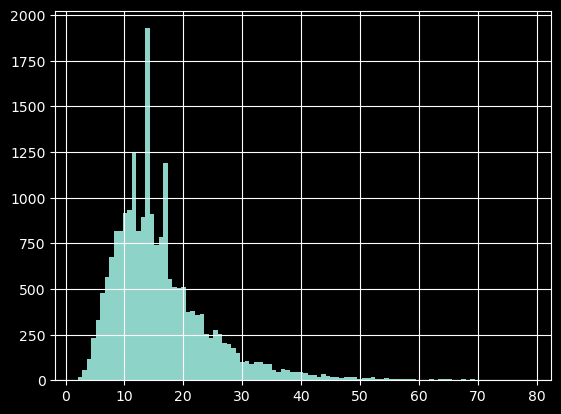

In [77]:
total_income_q.loc[total_income_q<80].hist(bins=100)

<AxesSubplot:>

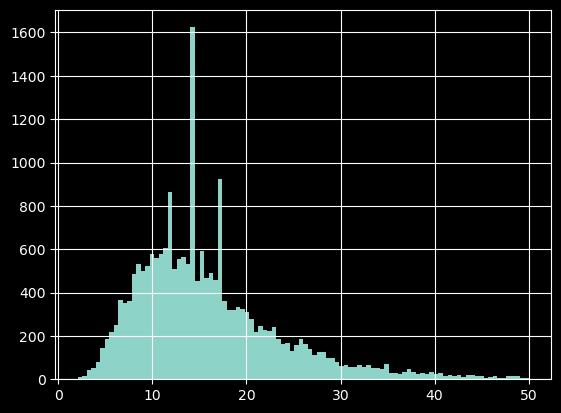

In [78]:
total_income_q.loc[total_income_q<50].hist(bins=100)

<AxesSubplot:>

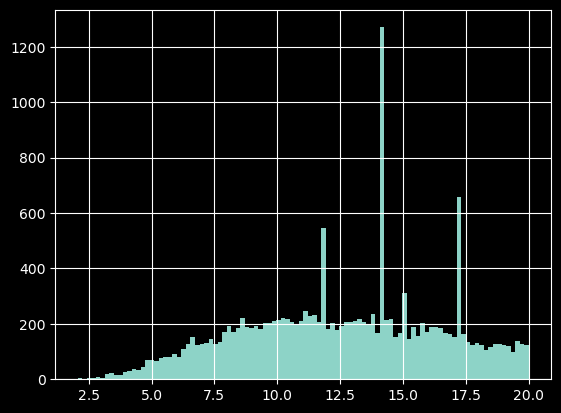

In [79]:
total_income_q.loc[total_income_q<20].hist(bins=100)

Поделю людей на категории дохода согласно гистограмме.
* 0_50000 - малый
* 50000-110000 - ниже среднего
* 110000_180000 - средний (охватыевает медиану и большинство людей в таблице)
* 180000-300000 - выше среднего
* 300000-700000 - высокий
* больше 700000 - сверхвысокий (как показывает гитсограмма,с заработком больше 700 000 людей  аномально мало)

In [80]:
#def total_income_group(x):
   # if x <= 50000:
   #     return 'малый'
   # if x <= 110000:
   #     return 'ниже среднего'
   # if x <= 180000:
   #     return 'средний'
   # if x <= 300000:
   #     return 'выше среднего'
   # if x <= 700000:
   #     return 'высокий'
   # return 'сверхвысокий'
    
#df['total_income_category'] = df['total_income'].apply(total_income_group)    

#df['total_income_category'] = pd.cut(df['total_income'],[0,50000,110000,180000,300000,700000,2265605])

In [81]:
#df.groupby('total_income_category')['debt'].agg(['count','mean'])

Те кто имеет низкий заработок чаще возвращают долги. Но их очень мало (меньше двух процентов), а остальные около медианы, поэтому в скор добавлять не буду.

<div class="alert alert-danger">
<b>❌ Комментарий ревьюера v1:</b> 
<br>Нужно произвести категоризацию клиентов по уровню доходу согласно заданию (A-B-C-D-E)
</div>

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br> Сейчас сделаю.
<br>
</div>

In [82]:
def total_income_group(x):
    if x <= 30000:
        return 'E'
    if x <= 50000:
        return 'D'
    if x <= 200000:
        return 'C'
    if x <= 1000000:
        return 'B'
    return 'A'
    
df['total_income_category'] = df['total_income'].apply(total_income_group)   

In [83]:
df.groupby('total_income_category')['debt'].agg(['count','mean'])

,count,mean
total_income_category,,
A,25,0.080000
B,5008,0.070887
C,15904,0.085010
D,347,0.060519
E,22,0.090909


<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v2:</b> 
<br>Категоризация клиентов по уровню дохода и расчет доли должников произведены верно
</div>

### Шаг 2.7. Категоризация целей кредита.

In [84]:
df['purpose'].value_counts() #займемся столбцом 'purpose'

свадьба                                   786
на проведение свадьбы                     763
сыграть свадьбу                           759
операции с недвижимостью                  670
покупка коммерческой недвижимости         658
покупка жилья для сдачи                   648
операции с коммерческой недвижимостью     647
операции с жильем                         645
жилье                                     639
покупка жилья                             637
покупка жилья для семьи                   637
строительство собственной недвижимости    632
недвижимость                              628
операции со своей недвижимостью           624
строительство недвижимости                619
строительство жилой недвижимости          618
покупка своего жилья                      618
покупка недвижимости                      615
ремонт жилью                              604
покупка жилой недвижимости                601
на покупку своего автомобиля              501
заняться высшим образованием      

In [85]:
m = Mystem()

columns = ['original', 'lemms', 'good']
purpose_list = pd.DataFrame(data=[],columns=columns)
purpose_list['original'] = df['purpose'].value_counts().index

for i in purpose_list.index:
    purpose_list.loc[i,'lemms'] = ' '.join(m.lemmatize(purpose_list.loc[i, 'original']))

purpose_list

,original,lemms,good
0,свадьба,свадьба \n,NaN
1,на проведение свадьбы,на проведение свадьба \n,NaN
2,сыграть свадьбу,сыграть свадьба \n,NaN
3,операции с недвижимостью,операция с недвижимость \n,NaN
4,покупка коммерческой недвижимости,покупка коммерческий недвижимость \n,NaN
5,покупка жилья для сдачи,покупка жилье для сдача \n,NaN
6,операции с коммерческой недвижимостью,операция с коммерческий недвижимость \n,NaN
7,операции с жильем,операция с жилье \n,NaN
8,жилье,жилье \n,NaN
9,покупка жилья,покупка жилье \n,NaN


Здесь видно, что имееться всего 4 цели - свадьба, недвижимость, покупка авто и образование, просто их по-разному написали.

In [86]:
%%time
lem_purpose = dict({'свадьба':'свадьба', 
                    'жилье':'недвижимость', 
                    'недвижимость':'недвижимость',
                    'автомобиль':'автомобиль', 
                    'образование':'образование'})

def replace_wrong_purpose(row):
    str_lem_list = m.lemmatize(row)
    for lem in str_lem_list:
        if lem in lem_purpose.keys():
            return lem_purpose[lem]

        
purpose_list['good'] = purpose_list['original'].apply(replace_wrong_purpose)

purpose_list #проверяю

Wall time: 1min 41s


,original,lemms,good
0,свадьба,свадьба \n,свадьба
1,на проведение свадьбы,на проведение свадьба \n,свадьба
2,сыграть свадьбу,сыграть свадьба \n,свадьба
3,операции с недвижимостью,операция с недвижимость \n,недвижимость
4,покупка коммерческой недвижимости,покупка коммерческий недвижимость \n,недвижимость
5,покупка жилья для сдачи,покупка жилье для сдача \n,недвижимость
6,операции с коммерческой недвижимостью,операция с коммерческий недвижимость \n,недвижимость
7,операции с жильем,операция с жилье \n,недвижимость
8,жилье,жилье \n,недвижимость
9,покупка жилья,покупка жилье \n,недвижимость


In [ ]:
%%time
df['purpose'] = df['purpose'].apply(replace_wrong_purpose) #заменяю

In [ ]:
df['purpose'].value_counts() #заменяю

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Основные цели кредита определены правильно! 👍
</div>

Теперь сравним каждую категорию с debt.

In [ ]:
#df.groupby('purpose')['debt'].agg(['count','mean']) 

Те кто берут кредит на образование и автомобиль возвращают их хуже.
 Присвою им score 1.

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b>
<br>Абсолютно верно!
</div>

<div class="alert alert-danger">
<b>❌ Комментарий ревьюера v1:</b> 
<br>У тебя верные расчеты, но давай потренируемся строить сводные таблицы используя метод pivot_table. Построй её для ответа на любой из вопросов и в расчитай внутри таблицы долю должников внутри каждой группы. С этим может помочь aggfunc='mean'
</div>

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br> Хорошо, тогда вот для столбцов 'children' и 'family_status'
<br>
</div>

In [ ]:
pd.pivot_table(df,index='children',values='debt',aggfunc=['mean','count'])

In [ ]:
pd.pivot_table(df,index='family_status',values='debt',aggfunc=['mean','count'])

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v2:</b>
<br>Сводная таблица построена верно!
</div>

In [ ]:
df['purpose_score'] = df['purpose'].isin(['автомобиль','образование'])*1

### Теперь сложу все score-столбцы и посмотрю что получилось

In [ ]:
df['score'] = df[['has_children','no_higher_education','dob_years_score','gender_score','family_score','purpose_score']].sum(axis=1)
df['score_round'] = df['score'].round()
df['score_q'] = pd.qcut(df['score'], 20)

In [ ]:
df.groupby('score_round')['debt'].mean().plot()

In [ ]:
df['score_q'] = pd.qcut(df['score'], 20)

In [ ]:
df.groupby('score_q')['debt'].agg(['count','mean'])

In [ ]:
df.to_csv (r' C:\Пользователи\df.csv', index= False )

# Как видно у кого score больше 2.5 в среднем имееют более высокий  шанс задолжности, но особо резкое отличное начинается с 3.5 баллов, там шанс задолжности преваливает за 11%, а после 4.5 и вовсе 17% - вдвое больше среднего значения!
 
# Те у кого скор меньше 1.5 имеют задолжности не чаще 5.1% случаев. 

# Вывод - все параметры имеют значение.

### Ответы на вопросы.

##### Вопрос 1:  Влияет-ли семейное положение на погошение отвта в срок?

##### Вывод 1:

Да влияет, те кто находиться в гражданском браке или никогда не вступал в брак хуже выплачивают долги.

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Верно 👍
</div>

##### Вопроc 2: Влияет-ли количество детей на погошение отвта в срок?

##### Вывод 2:

Да влияет, те у кого нет детей лучше возвращают долги.

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Верно 👍
</div>

## Общий вывод:

# Практически все характеристики имееют свой вес, исключение составил доход. Как выяснилось те, кто имеет  заработок от 30001 до 50000 чаще вовращают кредиты в срок, а все остальные в пределах среднего значения. Вот что получаеться по каждому параметру:

# *Чем старше человек тем меньше шанс просрочки.
# *Те у кого нет детей возращают лучше,чем тем у кого есть.
# *Люди с высшим образованием возвращают долги почти вдвое чаще, чем те у кого нет высшего.
# *Те кто находиться в гражданском браке или никогда не вступал в брак хуже выплачивают долги.
# *Те кто берут кредит на недвижимость и свадьбу, чаще возращают.
# *Женщины возращают долги чаще мужчин.

## Выводы сделаны по предоставленным данным, если выборка будет больше выводы могут измениться. 
## Сейчас у нас получаеться что лучшее кредиторы это : овдовевшие (или хотя бы просто в разводе, но и замужние попрут) женщины после 50, без детей, с высшим образванием, которые берут кредит на свадьбу (ну тут все сходиться) или на недвижимость.

## Самые худшие кредиторы это : неженатые молодые мужчины до 30 лет, с детьми, без высшего образванием (тем более только с начальным), которые берут кредит на образование или автомобиль.

<div class="alert alert-danger">
<b>❌ Комментарий ревьюера v1:</b> 
<br>Общий вывод тоже нужно будет поправить в части с доходами
</div>

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v2:</b> 
<br>Всё верно 👍
</div>

<div class="alert alert-danger">
<b>❌ Итоговый комментарий ревьюера v1:</b> 
<br>Ты хорошо потрудился, большая часть работы сделана, но остаётся внести следующие правки:
<br>- заполнить пропуски и поработать с аномалиями в столбце days_employed
<br>- поправить категоризацию клиентов по уровню дохода
<br>- поправить общий вывод
<br>- построить сводную таблицу используя метод pivot_table() для любого из вопросов в шаге 3. В таблице нужно произвести расчет доли должников внутри каждой группы клиентов. 
</div>

<div class="alert alert-danger">
<b>❌ Итоговый комментарий ревьюера v2:</b> 
<br>Осталась последняя правка:
<br>- поработать с аномалиями в столбце days_employed
</div>

<div class="alert alert-success">
<b>✔️ Итоговый комментарий ревьюера v3:</b>
<br>Все правки выполнены. Молодец!
<br>Ты проделал большую работу! У тебя точные выводы с хорошей аргументацией. Здорово, что ты пишешь свои рассуждения и предположения - это помогает видеть ход твоей мысли. Отдельно хочу выделить аккуратность и структурированность твоей работы. Рад был поработать над проверкой твоего проекта! Желаю удачи в дальнейшем обучении! 😉
</div>

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br> Спасибо за отличный ревью, мне тоже понравилось!)
<br>
</div>